# Problem Statement -

Lets imagine - I just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

### Stakeholder - Senior Product Manager

# Get the Data

I'll work with the Ecommerce Customers excel file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member.

### Import librabries

In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### Read in the Ecommerce Customers excel file as a DataFrame called data.

In [49]:
data = pd.read_excel("Ecommerce Customers.xlsx")

### Check the head of data, and check out its info() and describe() methods.

In [50]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel_x000D_\nWrightmouth, MI 82180...",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common_x000D_\nDiazchester, CA 065...",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,24645 Valerie Unions Suite 582_x000D_\nCobbbor...,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway_x000D_\nPort Jason, OH 2...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,14023 Rodriguez Passage_x000D_\nPort Jacobvill...,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [51]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [52]:
data.info()
# Hence a clean data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Analysis

### Lets explore the data

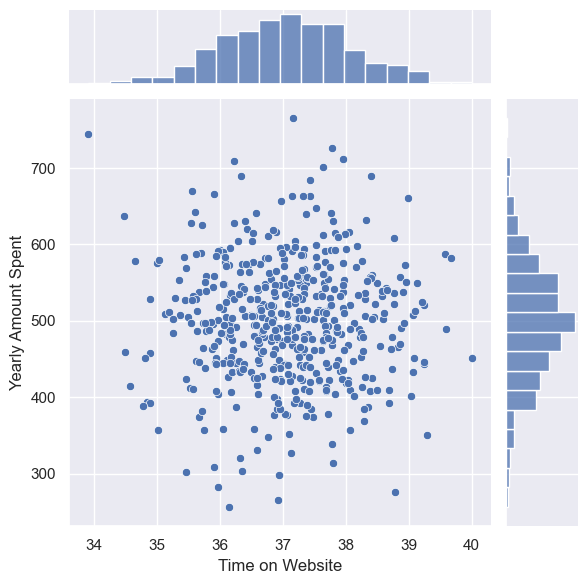

In [53]:
# seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = data)

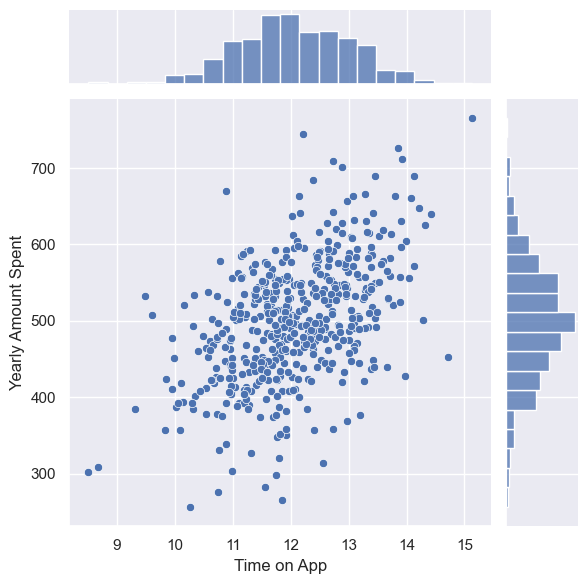

In [54]:
# the same but with the Time on App column instead.
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = data)

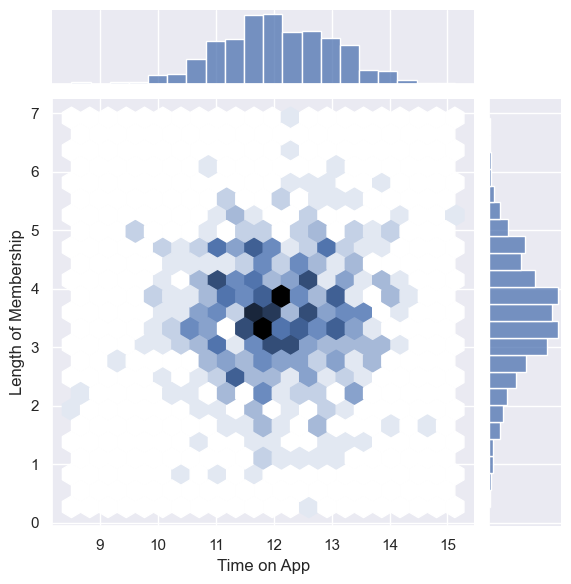

In [55]:
# Compareing Time on App and Length of Membership
sns.jointplot(x='Time on App',y ='Length of Membership', data = data, kind='hex')

### Now comparing these types of relationship with different features

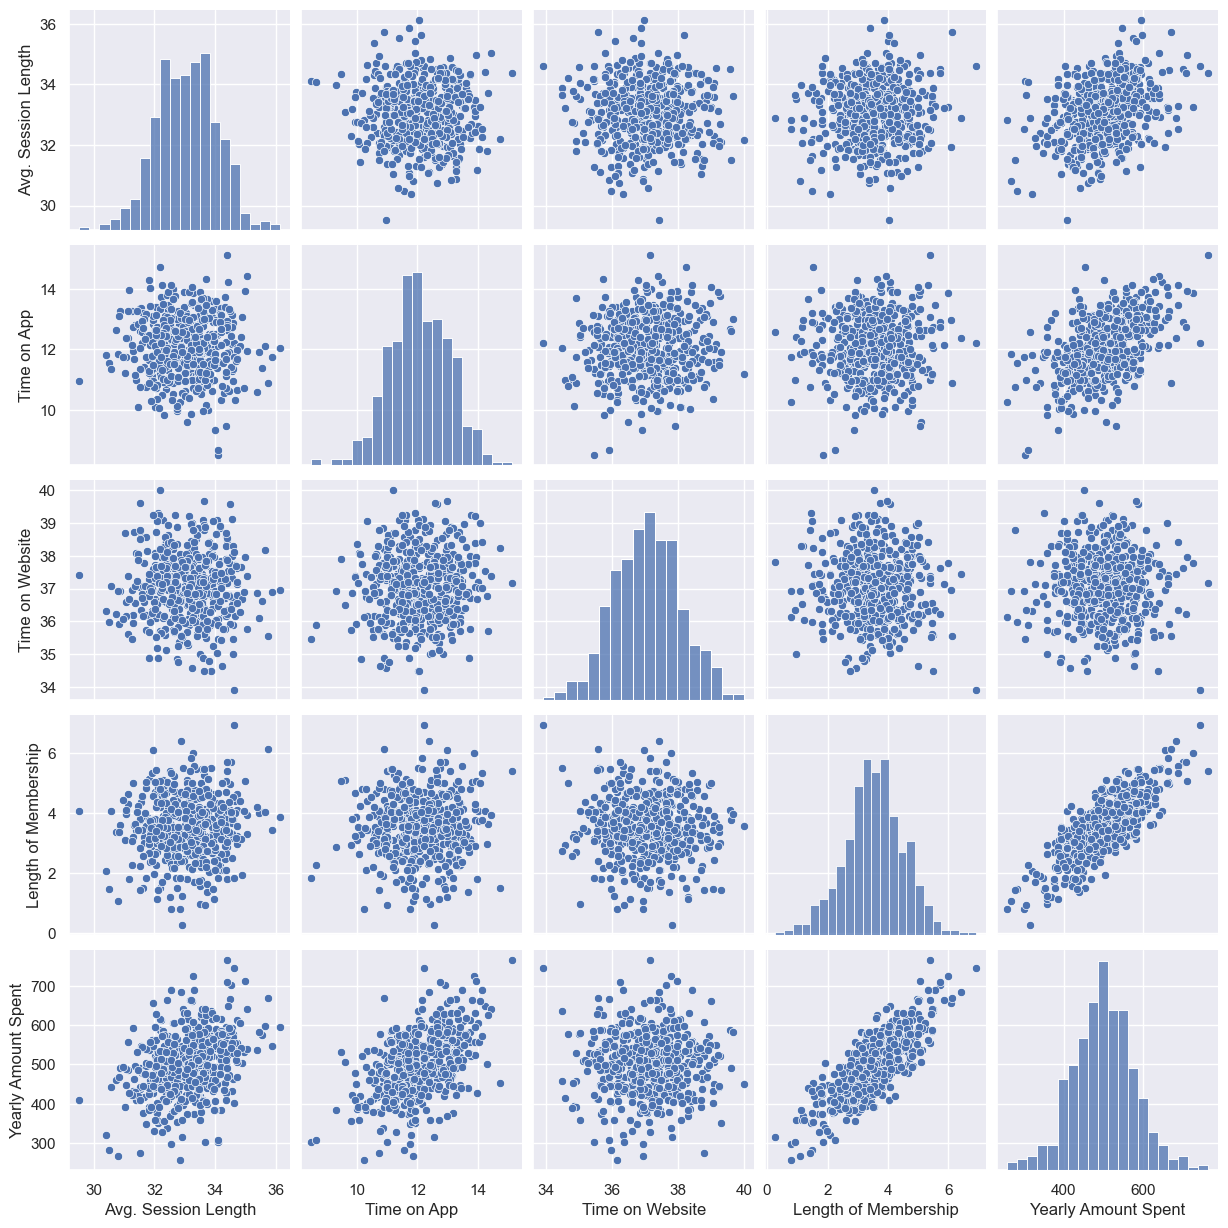

In [56]:
#this will show which feature have more linearity properties
sns.pairplot(data)

<AxesSubplot:>

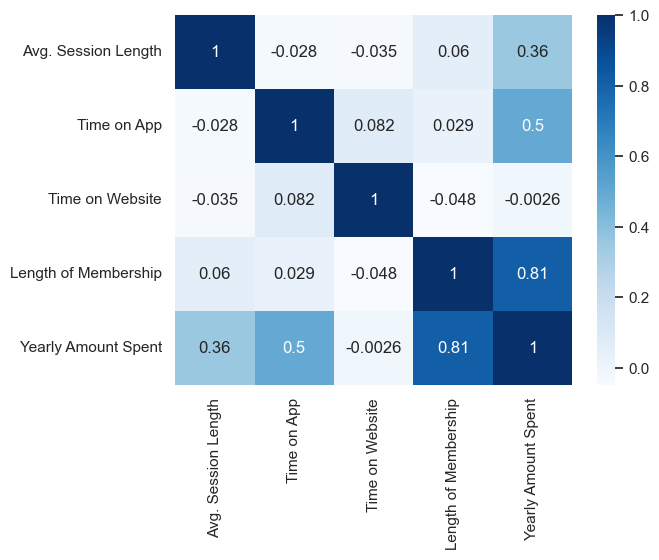

In [69]:
# heatmap show the max corelation
sns.heatmap(data.corr(),cmap = 'Blues', annot=True)

### From the above plot, Length of Membership looks very corelated with Yearly Amount Spent 
Length of Membership and Yearly amount spent shows more Linearity.

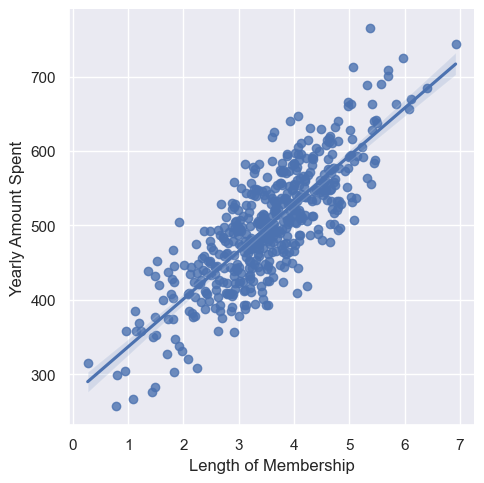

In [57]:
# Creating a Linear Model plot of Length of Membership vs Yearly amount spent
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

# Training and Testing Data

In [58]:
# variable X equal to the numerical features of the customers

X = data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [59]:
#  variable y equal to the "Yearly Amount Spent" column

y = data['Yearly Amount Spent']

In [60]:
# splitting the data into traing and testing split using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

In [61]:
# Train the model on traing data
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [62]:
# Coefficients of the model
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data

In [63]:
predictions = lm.predict(X_test)

Text(0.5, 0, 'Y test')

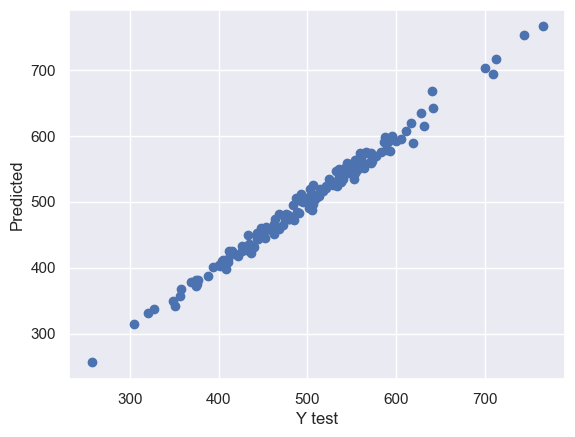

In [64]:
# scatterplot of the real test values versus the predicted values.
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

### Calculating metrics of linear regression 

- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [65]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.228148653430802
MSE: 79.8130516509741
RMSE: 8.933815066978614


# Residuals

Got a good model with good fit. Now I need to Check the distribution to make sure everything is okay with the data.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

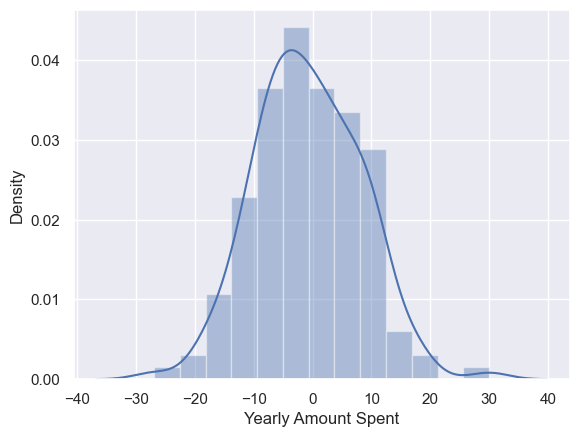

In [66]:
sns.distplot((y_test-predictions))

### Now, does the company need to focus on mobile app or website development?
I need to interpret the coefficients of all to get an idea.

In [68]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### The greater the value the more related it is to the target, in this case it is Yearly Amount Spent

These numbers mean that holding all other features fixed, a 1 unit increase in Avg. Session Length will lead to an increase in $25.981550 in Yearly Amount Spent, and similarly for the other features.

So as Time on App is a much more significant factor than Time on Website, the company has a choice - they could either focus all the attention into the App as that is what is bringing the most money in, or they could focus on the Website as it is performing so poorly!

# The company should focus on the mobile app!